### Name: Tanubrata Dey
#### Partner: Jesus Mario Rangel
##### Homework 4: Logistic Regression & Decision trees

In [124]:
import pandas as pd
import os
import seaborn as sns
import math
import statistics
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics

##### 1. The following data was obtained from a study where 3D images were taken of a breast mass. The features are measurements of the mass, the goal is to use these measurements to predict the diagnosis (m=malignant andb=benign).  For a more detail understanding of the values see the link. The file is provided in NYU classes as a csv file called data.csv. Read it in and call it cancer_data. The four features we are interested in are **radius_mean, texture_mean, smoothness_mean, compactness_mean**.

In [125]:
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 30)

In [126]:
cancer_data = pd.read_csv("data.csv", sep=",")
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***

##### 2. Create a boxplot or violin plot for each variable to visualize the distribution of the values between malignant and benign samples. Which of the four variables will be most accurate in predicting by itself? Explain why.

In [127]:
cancer_data.diagnosis = cancer_data.diagnosis.astype('category')

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

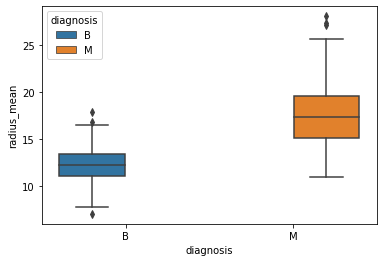

In [128]:
#radius mean
sns.boxplot(y="radius_mean", x="diagnosis", data=cancer_data, hue="diagnosis")

<AxesSubplot:xlabel='diagnosis', ylabel='texture_mean'>

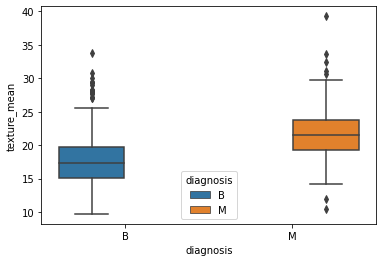

In [129]:
#texture mean
sns.boxplot(y="texture_mean", x="diagnosis", data=cancer_data, hue="diagnosis")

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

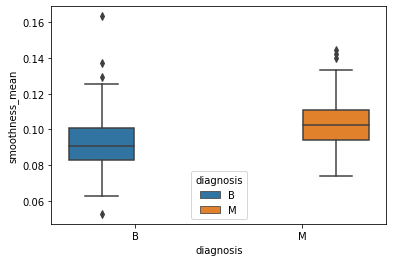

In [130]:
#smoothness mean
sns.boxplot(y="smoothness_mean", x="diagnosis", data=cancer_data, hue="diagnosis")

<AxesSubplot:xlabel='diagnosis', ylabel='compactness_mean'>

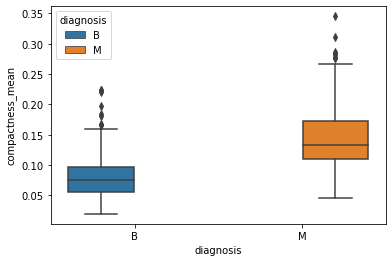

In [131]:
#compactness mean
sns.boxplot(y="compactness_mean", x="diagnosis", data=cancer_data, hue="diagnosis")

I think the radius_mean variable will be more accurate for predicting by itself because the median, lower quartile and upper quartile of the "Malignant" samples are all above the corresponding values than that of "Benign" samples, also the interquartile range of Malignant is bigger than that of Benign. Also if you notice the potential outliers for Malignant tends to be higher than that of Benign in case of radius_mean data which gives a clear idea of difference between benign and malignant. So from this idea we can derive that the higher the radius of the sample, the sample tends to be malignant.

Now if you visualize other plots, you would see the median, upper and lower quartile are not well distributed and for one of them the median tends to be same for both benign and malignant, meaning both of datas are overlapping and these are hard to differentiate. Also, if you see the outliers for the boxplots of the varibles except radius mean they tend to fall almost in same path for both of them and overall its hard to interpret. So based on this, **radius_mean variable** will be most accurate for predicting itself because they are well differentiated.

***

##### 3. Randomly remove 20% of our data and save it as test_set and the other 80% as training_set. Keep the proportion of Benign and Malignant the same in your test_set and training_set datasets.

In [132]:
#select the desired data
x = np.array(cancer_data.loc[:,["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean"]])
y = np.array(cancer_data.diagnosis)

In [133]:
#train_test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


***

##### 4. Using the training_set, create a logistic regression model usingthe glm() or sklearn.linear_model.LogisticRegression() function described in our lecture to create a model for each variable separately.
##### Calculate AUC using the test_set to determine which of the four variables is the most helpful predictor.

In [134]:
#Radius_mean_data
logistic_radius_mean = LogisticRegression(penalty = "none").fit(x_train[:,[0]], y_train)

#radius_mean predict probabilty
predict_radius_mean = logistic_radius_mean.predict_proba(x_test[:,[0]])[:, 1]

#auc score for radius mean
a = roc_auc_score(y_test, predict_radius_mean)


In [135]:
#Texture_mean_data
logistic_texture_mean = LogisticRegression(penalty = "none").fit(x_train[:,[1]], y_train)

#texture_mean predict probabilty
predict_texture_mean = logistic_texture_mean.predict_proba(x_test[:,[1]])[:, 1]

#auc score for texture mean
b = roc_auc_score(y_test, predict_texture_mean)


In [136]:
#Smoothness_mean_data
logistic_smoothness_mean = LogisticRegression(penalty = "none").fit(x_train[:,[2]], y_train)

#smoothness_mean predict probabilty
predict_smoothness_mean = logistic_smoothness_mean.predict_proba(x_test[:,[2]])[:, 1]

#auc score for smoothness mean
c = roc_auc_score(y_test, predict_smoothness_mean)


In [137]:
#compactness_mean_data
logistic_compactness_mean = LogisticRegression(penalty = "none").fit(x_train[:,[3]], y_train)

#compactness_mean predict probabilty
predict_compactness_mean = logistic_compactness_mean.predict_proba(x_test[:,[3]])[:, 1]

#auc score for compactness mean
d = roc_auc_score(y_test, predict_compactness_mean)


In [138]:
print("AUC for radius_mean: ", a)
print("AUC for texture_mean: ", b)
print("AUC for smoothness_mean: ", c)
print("AUC for compactness_mean: ", d)

AUC for radius_mean:  0.9365079365079365
AUC for texture_mean:  0.802579365079365
AUC for smoothness_mean:  0.6402116402116401
AUC for compactness_mean:  0.8452380952380952


Comparing the AUC score for all of the 4 variables above, we can see the AUC for radius_mean was higher than the other 3 variables so **radius_mean is the most helpful predictor**.

***

##### 5. Repeat step 3 but this time with all the variables together and calculate the AUC to compare the results. Does this improve theperformance? What conclusions can you draw from the coefficients?

In [139]:
#standard scaling of the data of 4 variables
std_scaling = StandardScaler()
x_train = std_scaling.fit_transform(x_train)
x_test = std_scaling.fit_transform(x_test)

#logistic_regression_data
logistic_reg_all = LogisticRegression(penalty = "none").fit(x_train, y_train)

#logistic regression all predict probabilty
predict_logistic_reg_all = logistic_reg_all.predict_proba(x_test)[:, 1]

#auc score for all
e = roc_auc_score(y_test, predict_logistic_reg_all)




In [141]:

#AUC score for all 4 variables together
print("AUC for all 4 variables together: ", e)



AUC for all 4 variables together:  0.9765211640211641


In [140]:


#coefficient of regression model with all 4 variables
logistic_reg_all.coef_

array([[4.83732118, 1.76005715, 1.7876502 , 0.77242306]])

Based on the AUC score I got higher score for all 4 variables than that of the each single variable, so **I believe the performance improved**.

By scaling all the 4 variables to compare the coefficient between the 4 variables, we can conclude that the **radius_mean is a good predictor and statistically significant** based on the values of coefficient, **radius_mean has the highest coefficient value** of ~4.84 than the other 3 variables.

***

##### 6. Using the plots you generated earlier, which variable do you expect to be at the root of the decision tree? Explain your answer.


Based on the boxplots generated in Q2, I believe radius_mean makes more sense because the data are well distributed and not overlapping and is easier to differentiate between two than the other 3 variables. Also if you compare it with AUC score and coefficients, radius_mean has the highest value which is promising to see on root of the tree.

***

##### 7. Perform a decision tree classification using two different values for max_depth parameter. Draw the tree for both and compare AUC for both.

In [142]:
#I did this part again because scaling the data before changes the numbers in decision tree to negative, 
#which I think is not correct, but it is worth mentioning that the table shape did not change due to scaling.

#train_test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


* **Tree and AUC with max_depth of 2**

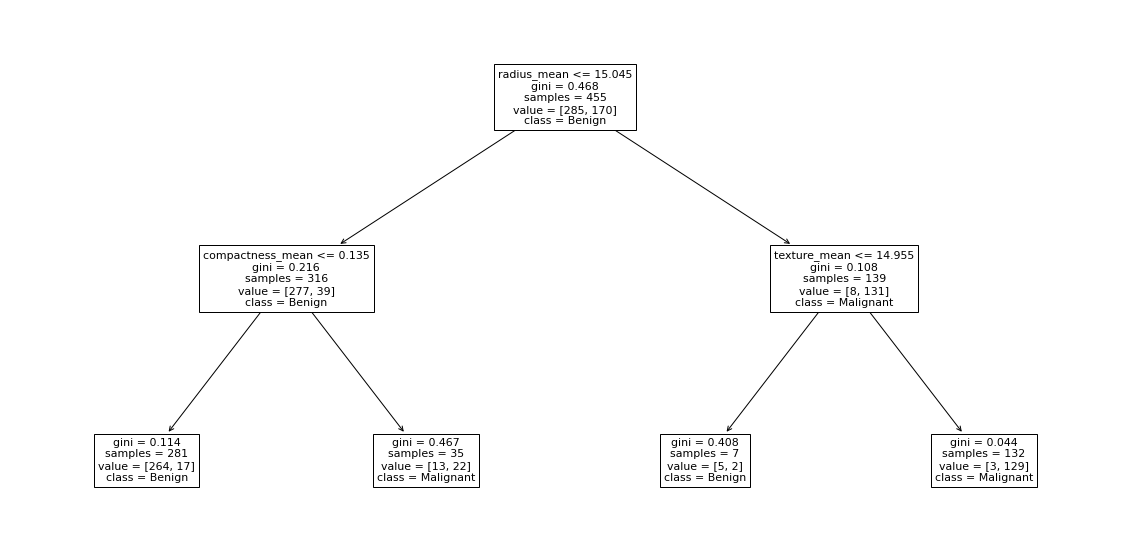

In [143]:
#Training the decision tree model with train data at depth of 2
clf = DecisionTreeClassifier(max_depth=2).fit(x_train,y_train)

#plotting the tree of depth 2
%matplotlib inline
plt.figure(figsize=(20,10))
plot = tree.plot_tree(clf,feature_names = ["radius_mean","texture_mean", "smoothness_mean", "compactness_mean"], 
                      class_names = ["Benign","Malignant"], fontsize=11)
plt.show()

In [144]:
# calculate the fpr and tpr for all thresholds of the classification at depth 2.
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label="M")

#AUC for the above tree with depth 2
roc_auc = metrics.auc(fpr, tpr)

print("The AUC score for the tree with max_depth of 2 is: ", roc_auc)

The AUC score for the tree with max_depth of 2 is:  0.8766534391534392


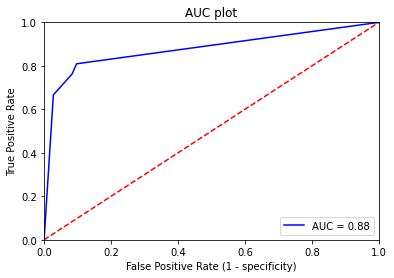

In [145]:
%matplotlib inline
#plotting the AUC curve for the tree with depth of 2
plt.figure()

plt.title('AUC plot')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.show()

* **Tree and AUC with max_depth of 4**

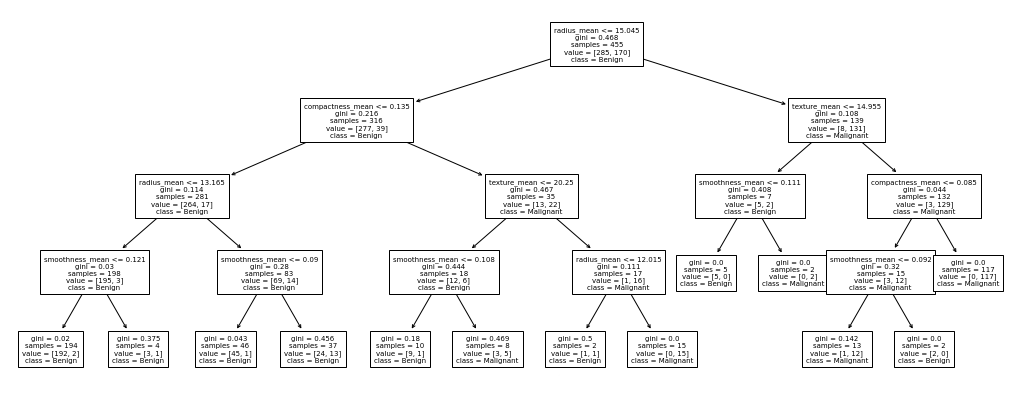

In [146]:
#Training the decision tree model with train data at depth of 4
clf1 = DecisionTreeClassifier(max_depth=4).fit(x_train,y_train)

#plotting the tree of depth 4
%matplotlib inline
plt.figure(figsize=(18,7))
plot = tree.plot_tree(clf1,feature_names = ["radius_mean","texture_mean", "smoothness_mean", "compactness_mean"], 
                      class_names = ["Benign","Malignant"], fontsize=7)
plt.show()

In [147]:
# calculate the fpr and tpr for all thresholds of the classification at depth 4.
probs1 = clf1.predict_proba(x_test)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1, pos_label="M")

#AUC for the above tree with depth 4
roc_auc1 = metrics.auc(fpr1, tpr1)

print("The AUC score for the tree with max_depth of 4 is: ", roc_auc1)

The AUC score for the tree with max_depth of 4 is:  0.8969907407407408


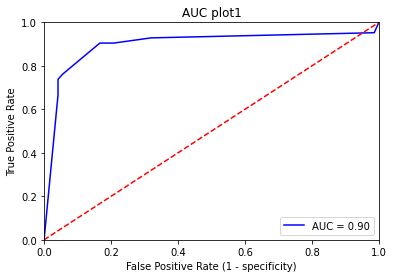

In [148]:
%matplotlib inline
#plotting the AUC curve for the tree with depth of 4
plt.figure()

plt.title('AUC plot1')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.show()

The AUC score for the tree with max_depth of 2 is ~0.88 whereas the AUC score for the tree with max_depth of 4 is ~0.90, and if you see the graph for AUC the area under the curve is greater for max_depth of 4 than that of max_depth of 2. So based on this **we can say that increasing the max_depth of the tree increases the AUC score**.

***

##### 8. Discuss and compare the results from the two trees.

Comparing the two trees, increasing the max_depth increases the density data of the trees, so let's say for our tree with depth 2, the stages are [0, 1, 2] where 0 is the root and if you compare with depth 4, the stages are [0, 1, 2, 3, 4] where 0 is the root and you can see the diversity of data the tree with depth 4 has than that of 2. Also, comparing the two trees you can see the variables assigned depends on the AUC score of the variable, so let's say radius_mean has highest AUC, so radius_mean always stays the root. And the second highest AUC was compactness_mean and if you see the trees, both have compactness_mean to the left from the root. And then follows texture_mean and then smoothness_mean. The gini coefficient in each box of tree say about how likely the data are similar or different, so the lower the the value the higher the equality and the lower the value the higher the inequality of data. Also if you check the values on each box of the tree, the values determine whether that data in box relates to malignant or benign, so let's say if the left value inside the bracket is higher, then its benign but if the right value is higher, then it becomes malignant.  

***